In [1]:
import torch
import json
import numpy as np
import tiktoken
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

from sparse_auto_encoder import SparseAutoencoder
from utils.model import load_GPT_model
from saes__extract_latent_activations import exract_latent_activations
from saes__filter_selective_neurons import find_selective_neurons
from saes__neuron_concept_assoc import calculate_neuron_to_concept_assoc
from saes__top_texts_for_neuron import top_texts_for_neuron
from saes__neuron_concept_mapping import build_neuron_concept_map

In [2]:
device = "cpu"

In [3]:
model = load_GPT_model(path="model_896_14_8_256.pth", device=device)

In [4]:
sae_1 = SparseAutoencoder(input_dim=896, hidden_dim=2688).to(device)
sae_1.load_state_dict(torch.load("sae_models/sae_layer1.pth", map_location=torch.device('cpu')))
sae_1.eval();

sae_2 = SparseAutoencoder(input_dim=896, hidden_dim=2688).to(device)
sae_2.load_state_dict(torch.load("sae_models/sae_layer2.pth", map_location=torch.device('cpu')))
sae_2.eval();

sae_3 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_3.load_state_dict(torch.load("sae_models/sae_layer3.pth", map_location=torch.device('cpu')))
sae_3.eval();

sae_4 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_4.load_state_dict(torch.load("sae_models/sae_layer4.pth", map_location=torch.device('cpu')))
sae_4.eval();

sae_5 = SparseAutoencoder(input_dim=896, hidden_dim=3584).to(device)
sae_5.load_state_dict(torch.load("sae_models/sae_layer5.pth", map_location=torch.device('cpu')))
sae_5.eval();

sae_6 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_6.load_state_dict(torch.load("sae_models/sae_layer6.pth", map_location=torch.device('cpu')))
sae_6.eval();

sae_7 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_7.load_state_dict(torch.load("sae_models/sae_layer7.pth", map_location=torch.device('cpu')))
sae_7.eval();

sae_8 = SparseAutoencoder(input_dim=896, hidden_dim=4480).to(device)
sae_8.load_state_dict(torch.load("sae_models/sae_layer8.pth", map_location=torch.device('cpu')))
sae_8.eval();

In [5]:
latents_l1 = exract_latent_activations(model, sae_1, layer=1)
latents_l2 = exract_latent_activations(model, sae_2, layer=2)
latents_l3 = exract_latent_activations(model, sae_3, layer=3)
latents_l4 = exract_latent_activations(model, sae_4, layer=4)
latents_l5 = exract_latent_activations(model, sae_5, layer=5)
latents_l6 = exract_latent_activations(model, sae_6, layer=6)
latents_l7 = exract_latent_activations(model, sae_7, layer=7)
latents_l8 = exract_latent_activations(model, sae_8, layer=8)

✅ Saved sae_probing/latent_activations_l1.pt with latents shape torch.Size([665, 2688]) and 665 ids.
✅ Saved sae_probing/latent_activations_l2.pt with latents shape torch.Size([665, 2688]) and 665 ids.
✅ Saved sae_probing/latent_activations_l3.pt with latents shape torch.Size([665, 3584]) and 665 ids.
✅ Saved sae_probing/latent_activations_l4.pt with latents shape torch.Size([665, 3584]) and 665 ids.
✅ Saved sae_probing/latent_activations_l5.pt with latents shape torch.Size([665, 3584]) and 665 ids.
✅ Saved sae_probing/latent_activations_l6.pt with latents shape torch.Size([665, 4480]) and 665 ids.
✅ Saved sae_probing/latent_activations_l7.pt with latents shape torch.Size([665, 4480]) and 665 ids.
✅ Saved sae_probing/latent_activations_l8.pt with latents shape torch.Size([665, 4480]) and 665 ids.


In [6]:
def map_layer_neurons(layer, activation_threshold=5.0):
    find_selective_neurons(layer=layer, activation_threshold=activation_threshold)
    calculate_neuron_to_concept_assoc(layer=layer, threshold=activation_threshold);

    mappings = build_neuron_concept_map(layer=layer)
    print(f"✅ Done for layer {layer}")
    print('='*10)
    
    return mappings.head()

In [7]:
map_layer_neurons(layer=1)

Layer 1: N=665 tokensets, H=2688 neurons.
Window [5, 150], thresh=5.0. Selective found: 4
-> IDs saved to: sae_probing\selective_neuron_ids_l1.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l1.csv (44 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l1.csv
✅ Done for layer 1


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,1,236,female,0.275000,marriage,0.239311,0.129778,two-strong
1,1,907,male,0.278172,female,0.259854,0.065849,two-strong
2,1,1406,marriage,0.265301,female,0.217606,0.179775,two-strong
3,1,1829,family,0.248801,female,0.219126,0.119273,two-strong


In [8]:
map_layer_neurons(layer=2)

Layer 2: N=665 tokensets, H=2688 neurons.
Window [5, 150], thresh=5.0. Selective found: 9
-> IDs saved to: sae_probing\selective_neuron_ids_l2.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l2.csv (99 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l2.csv
✅ Done for layer 2


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,2,285,female,0.283387,marriage,0.247158,0.127845,two-strong
1,2,301,male,0.232620,None,NaN,1.000000,dominant
2,2,422,female,0.292948,marriage,0.230855,0.211959,leaning
3,2,999,male,0.248359,family,0.222348,0.104731,two-strong
4,2,1240,male,0.269751,family,0.224400,0.168123,two-strong


In [9]:
map_layer_neurons(layer=3)

Layer 3: N=665 tokensets, H=3584 neurons.
Window [5, 150], thresh=5.0. Selective found: 20
-> IDs saved to: sae_probing\selective_neuron_ids_l3.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l3.csv (220 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l3.csv
✅ Done for layer 3


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,3,181,female,0.372349,male,0.310971,0.164842,two-strong
1,3,221,marriage,0.235759,family,0.211312,0.103694,two-strong
2,3,293,marriage,0.264139,emotion,0.189259,0.283489,leaning
3,3,344,male,0.269751,family,0.210195,0.220783,leaning
4,3,383,female,0.283586,None,NaN,1.000000,dominant


In [10]:
map_layer_neurons(layer=4)

Layer 4: N=665 tokensets, H=3584 neurons.
Window [5, 150], thresh=5.0. Selective found: 34
-> IDs saved to: sae_probing\selective_neuron_ids_l4.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l4.csv (374 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l4.csv
✅ Done for layer 4


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,4,10,female,0.350917,family,0.296090,0.156240,two-strong
1,4,52,male,0.320349,emotion,0.306357,0.043679,two-strong
2,4,76,marriage,0.378828,scandal,0.157272,0.584844,dominant
3,4,117,female,0.217935,male,0.212644,0.024281,two-strong
4,4,208,family,0.385669,male,0.314085,0.185609,two-strong


In [11]:
map_layer_neurons(layer=5)

Layer 5: N=665 tokensets, H=3584 neurons.
Window [5, 150], thresh=5.0. Selective found: 61
-> IDs saved to: sae_probing\selective_neuron_ids_l5.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l5.csv (671 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l5.csv
✅ Done for layer 5


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,5,4,marriage,0.269068,emotion,0.180399,0.329543,leaning
1,5,44,society,0.271497,scandal,0.157077,0.421439,leaning
2,5,60,female,0.335597,family,0.316826,0.055935,two-strong
3,5,210,marriage,0.234699,society,0.233014,0.007182,two-strong
4,5,221,society,0.386765,wealth,0.195653,0.494128,leaning


In [12]:
map_layer_neurons(layer=6)

Layer 6: N=665 tokensets, H=4480 neurons.
Window [5, 150], thresh=5.0. Selective found: 106
-> IDs saved to: sae_probing\selective_neuron_ids_l6.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l6.csv (1166 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l6.csv
✅ Done for layer 6


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,6,2,love,0.327926,society,0.284099,0.133650,two-strong
1,6,101,marriage,0.234143,family,0.210575,0.100657,two-strong
2,6,226,male,0.251186,duty,0.147797,0.411601,leaning
3,6,263,society,0.291456,emotion,0.188533,0.353134,leaning
4,6,271,marriage,0.293872,duty,0.155294,0.471558,leaning


In [13]:
map_layer_neurons(layer=7)

Layer 7: N=665 tokensets, H=4480 neurons.
Window [5, 150], thresh=5.0. Selective found: 147
-> IDs saved to: sae_probing\selective_neuron_ids_l7.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l7.csv (1617 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l7.csv
✅ Done for layer 7


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,7,19,female,0.332071,society,0.231814,0.301915,leaning
1,7,98,marriage,0.284217,female,0.239332,0.157927,two-strong
2,7,101,marriage,0.239813,family,0.215793,0.100158,two-strong
3,7,121,family,0.561037,female,0.299657,0.465887,leaning
4,7,133,marriage,0.239967,society,0.235400,0.019032,two-strong


In [14]:
map_layer_neurons(layer=8)

Layer 8: N=665 tokensets, H=4480 neurons.
Window [5, 150], thresh=5.0. Selective found: 140
-> IDs saved to: sae_probing\selective_neuron_ids_l8.pt
✅ Associations table saved: sae_probing\neuron_label_assoc_l8.csv (1540 rows)
✅ Primary/secondary mapping saved: sae_probing\neuron_concept_primary_secondary_l8.csv
✅ Done for layer 8


,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
0,8,5,family,0.234858,wealth,0.195713,0.166678,two-strong
1,8,23,marriage,0.239025,family,0.186039,0.221675,leaning
2,8,82,emotion,0.191902,class,0.159604,0.168303,two-strong
3,8,128,male,0.319260,love,0.146262,0.541871,dominant
4,8,146,male,0.269751,family,0.211305,0.216669,leaning


---

## Plot dual-themed neurons

Plotting function:

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

color_map = {
    "female": "#FAD7AC",
    "male": "#cc9290",
    "marriage": "#ed76b3",
    "love": "#CC0000",
    "wealth": "#007FFF",
    "emotion": "#9467bd",
    "family": "#CC6600",
    "duty": "#a4d9f2",
    "scandal and reputation": "#B3B3B3",
    "society": "#67AB9F",
    "neutral": "#e5ced0",
    "class": "#90ee90"
}

def plot_dual_theme_graph_from_csv(
    csv_path, *, color_map=color_map, ax=None, return_fig=False, seed=62,
    layout="spring", spread=1.8, layer="UNK"
):
    """Reads primary/secondary CSV and plots normalized dual-theme concept graph."""
    df = pd.read_csv(csv_path)
    if "primary_concept" not in df.columns or "secondary_concept" not in df.columns:
        raise ValueError("CSV must contain 'primary_concept' and 'secondary_concept' columns.")
    df = df.dropna(subset=["primary_concept", "secondary_concept"])

    # Build edge list (orderless)
    edges = []
    for _, row in df.iterrows():
        a = str(row["primary_concept"]).strip(" ,").lower()
        b = str(row["secondary_concept"]).strip(" ,").lower()
        if a and b and a != "unk" and b != "unk":
            edges.append((a, b))

    if not edges:
        fig, axp = plt.subplots(figsize=(6, 3))
        axp.text(0.5, 0.5, "No dual-theme data", ha="center", va="center")
        axp.axis("off")
        fig.tight_layout()
        return (fig, axp) if return_fig else None

    G = nx.MultiGraph()
    G.add_edges_from(edges)

    # Create axes if needed
    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 12))
        created_fig = True
    else:
        fig = ax.figure

    # ---- Layout ----
    if layout == "kk":
        pos = nx.kamada_kawai_layout(G)
    else:
        base_k = 0.75 / max(len(G.nodes), 1) ** 0.25
        k = base_k * spread
        pos = nx.spring_layout(G, k=k, seed=seed, iterations=200)

    if spread > 1.0:
        xs, ys = zip(*pos.values())
        cx, cy = sum(xs)/len(xs), sum(ys)/len(ys)
        for n in pos:
            x, y = pos[n]
            pos[n] = (cx + (x - cx) * 1.15, cy + (y - cy) * 1.15)

    unique_nodes = list(G.nodes())
    node_colors = [color_map.get(node, "#cccccc") for node in unique_nodes]

    # ---- Edge normalization ----
    edge_weights = {tuple(sorted((u, v))): G.number_of_edges(u, v) for u, v in G.edges()}
    max_w = max(edge_weights.values())
    # scale edge widths: 1 (minimum) → 10 (maximum)
    norm_edges = {k: (0.5 + 19.5 * (w / max_w)) for k, w in edge_weights.items()}

    # ---- Draw ----
    nx.draw_networkx_nodes(G, pos, node_size=8000, node_color=node_colors, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=14, font_weight="bold", ax=ax)

    drawn = set()
    for (u, v), width in norm_edges.items():
        if (u, v) in drawn:
            continue
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=width, alpha=0.6, ax=ax)
        drawn.add((u, v))

    ax.set_title(f"Layer {layer}", fontsize=25)
    ax.axis("off")
    fig.tight_layout()

    if return_fig:
        return fig, ax

---

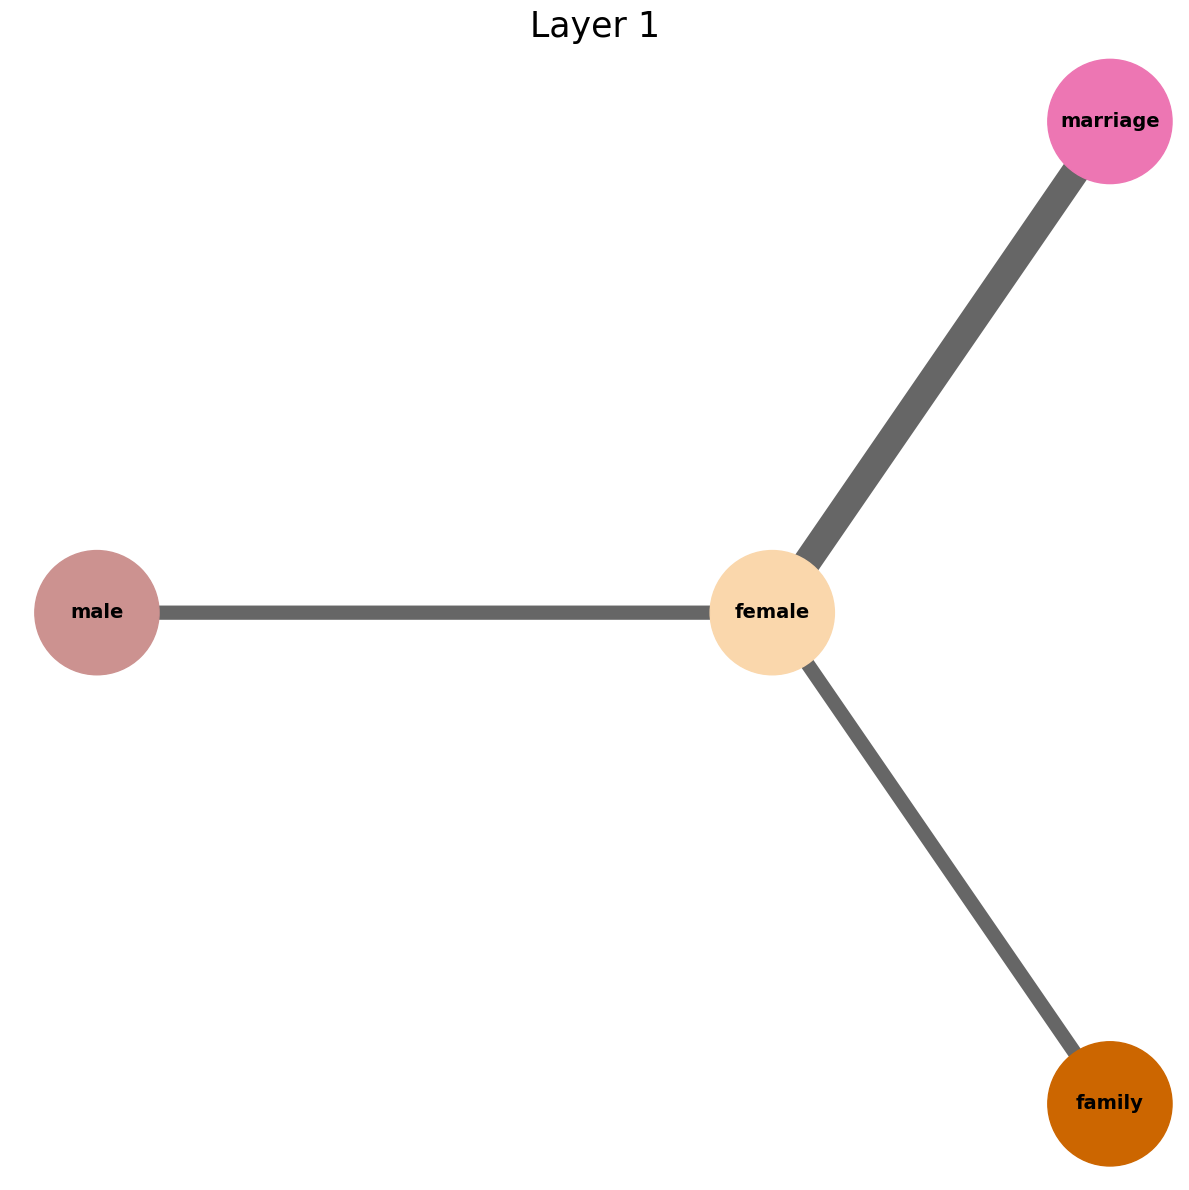

In [16]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l1.csv", layout="kk", layer=1)

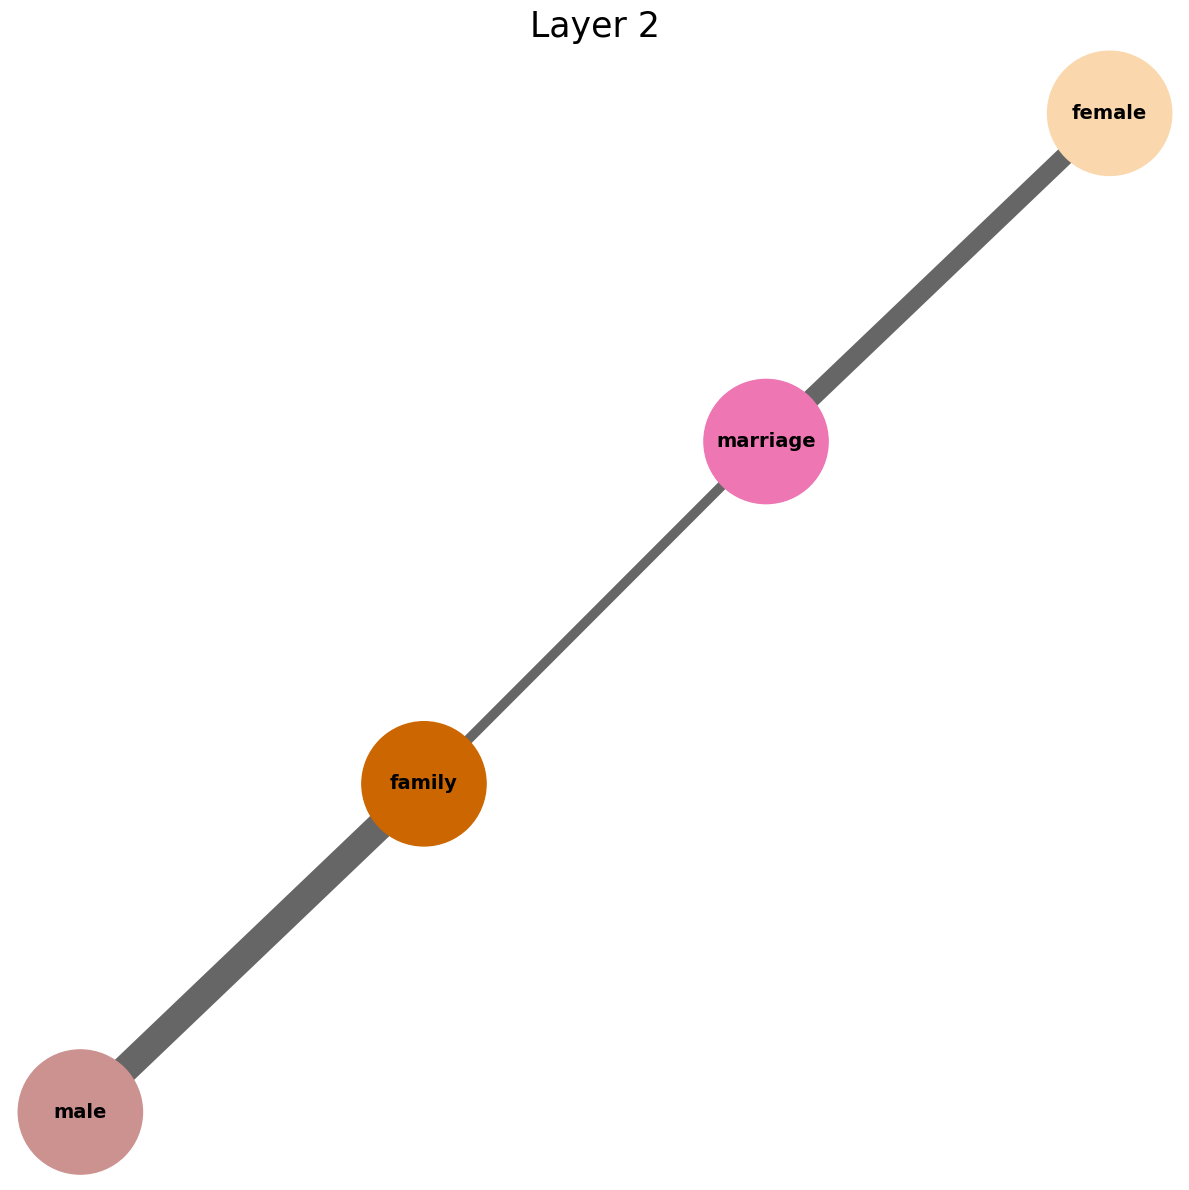

In [17]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l2.csv", layout="kk", layer=2)

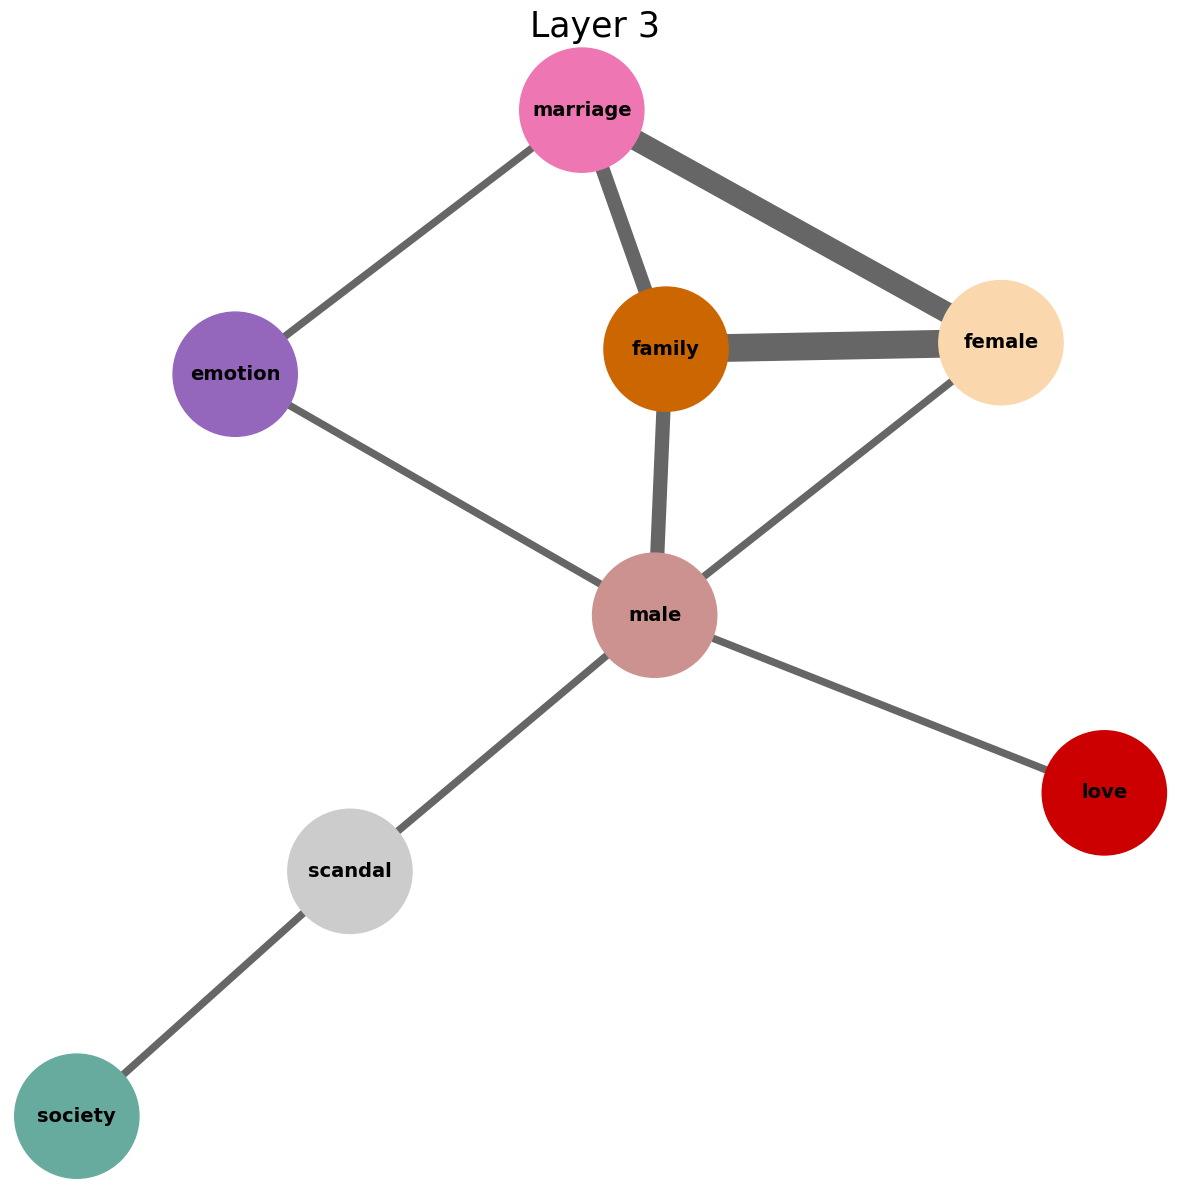

In [18]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l3.csv", layout='kk', layer=3)

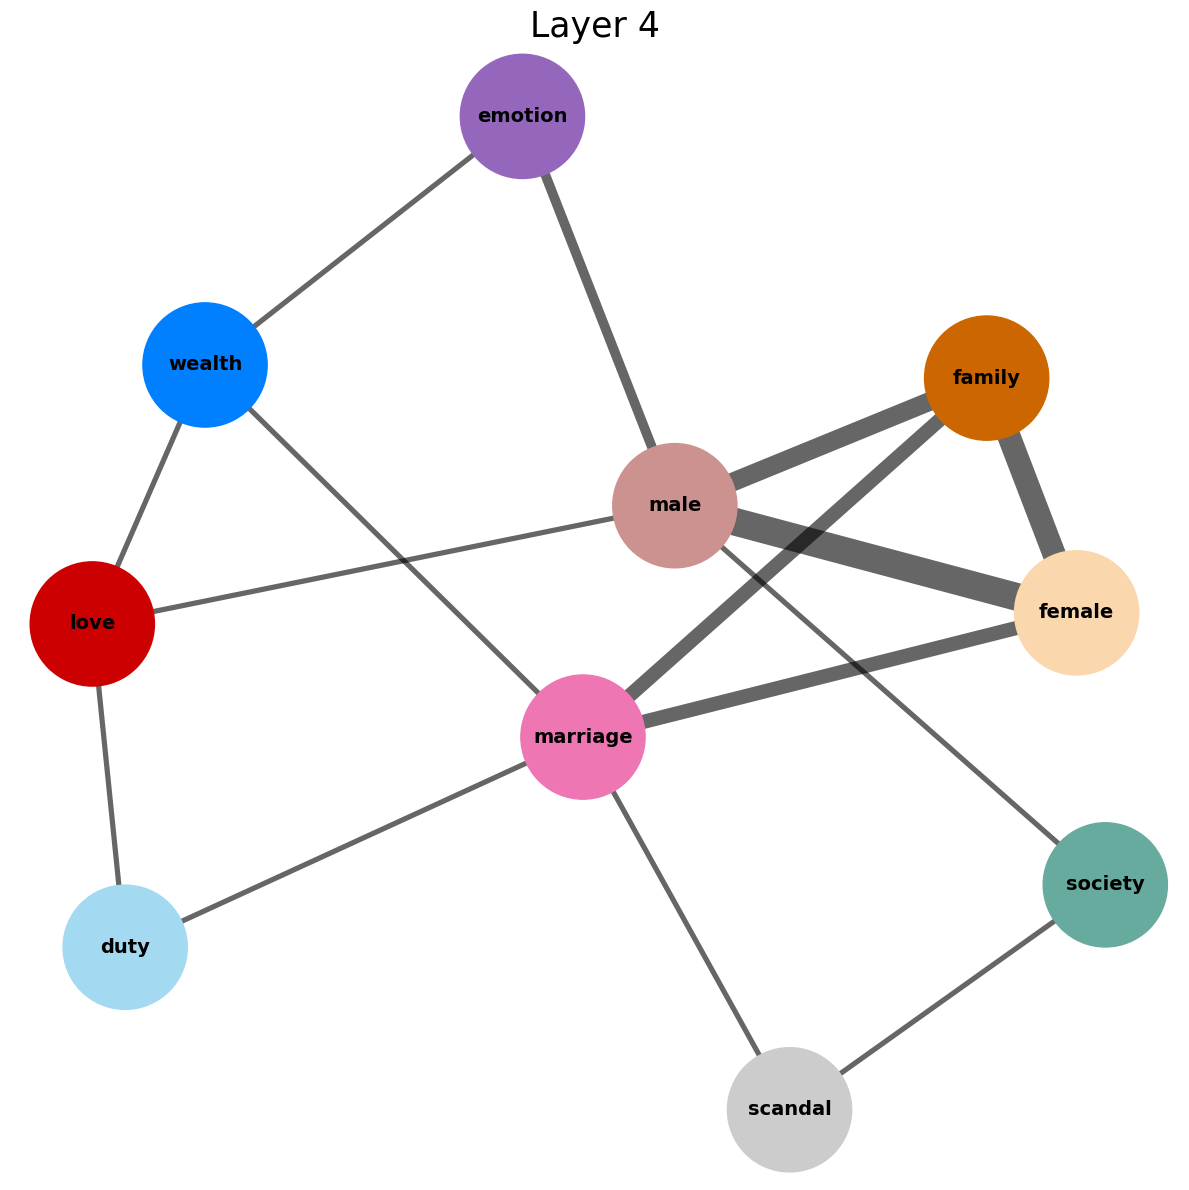

In [19]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l4.csv", layout='kk', layer=4)

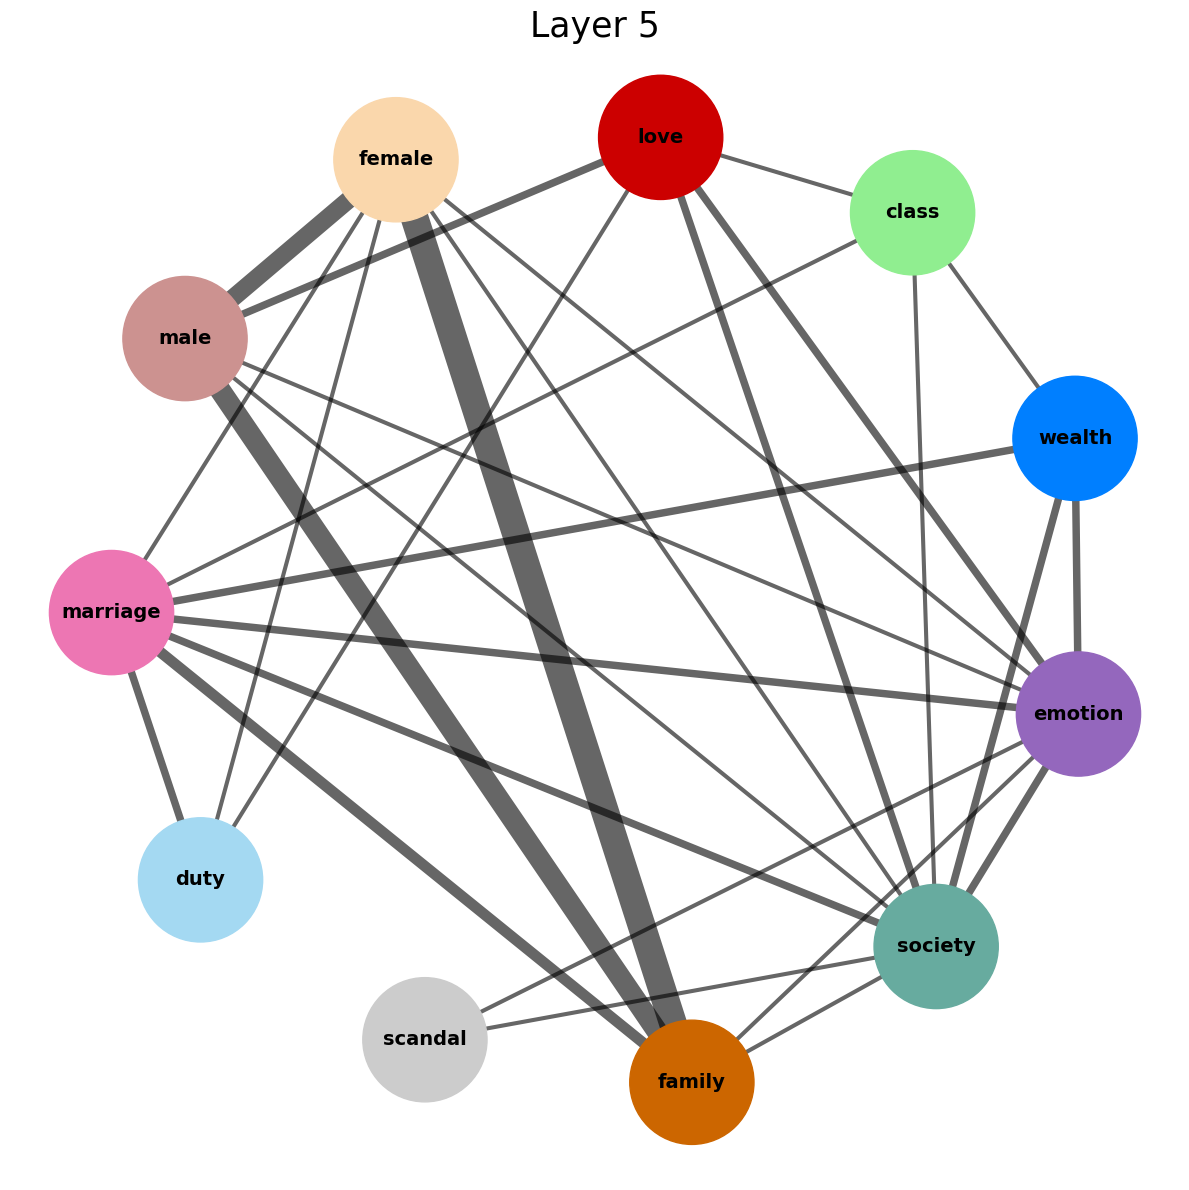

In [20]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l5.csv", spread=100, layer=5)

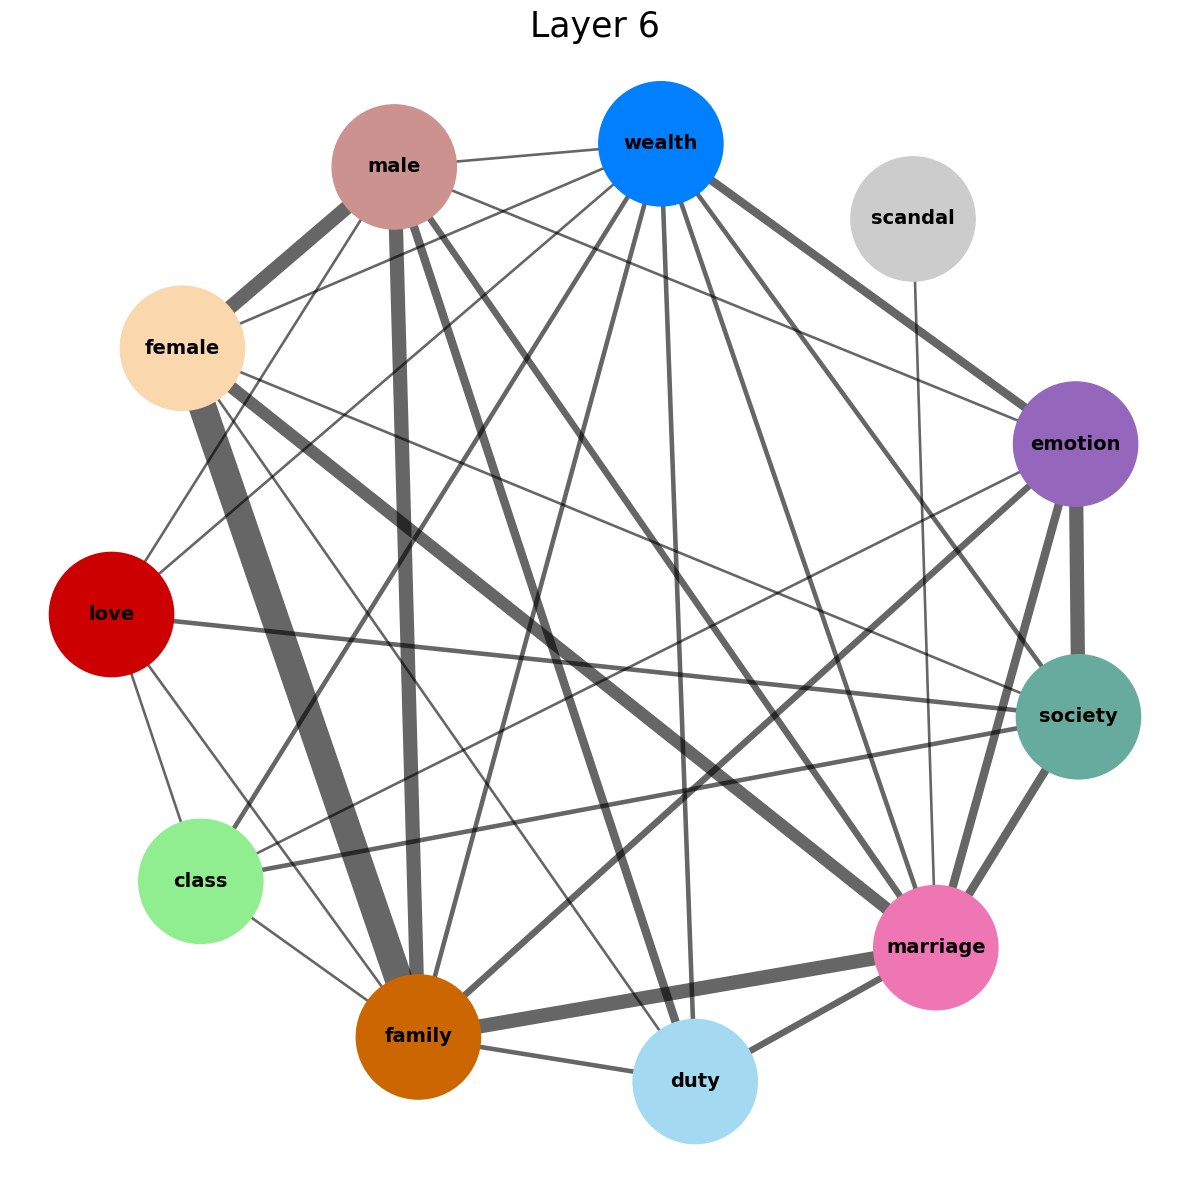

In [21]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l6.csv", spread=100, layer=6)

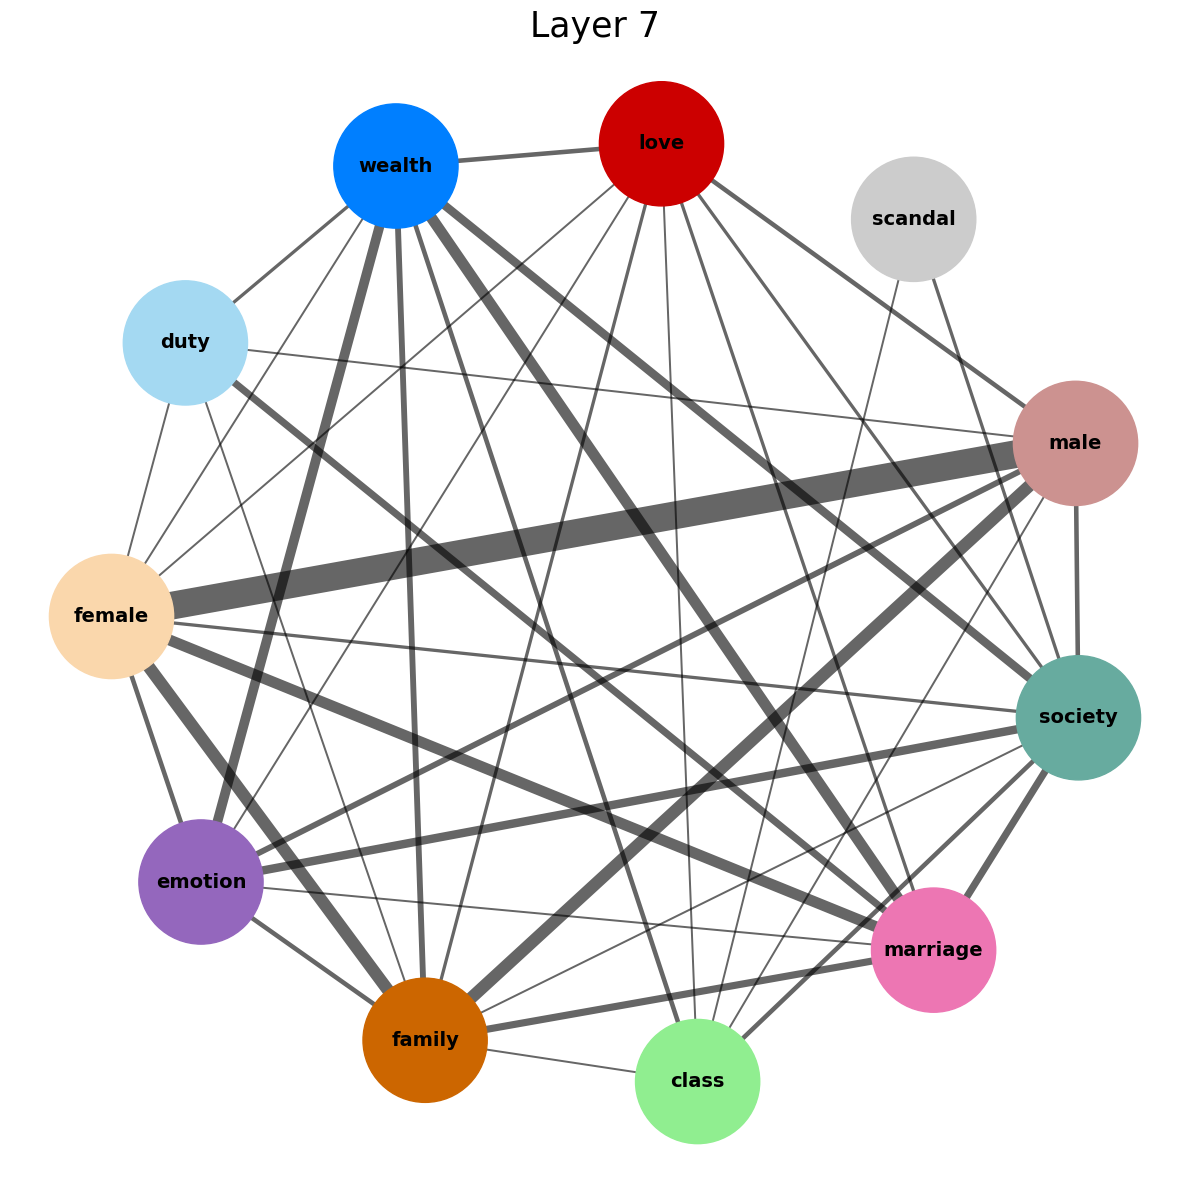

In [22]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l7.csv", spread=100, layer=7)

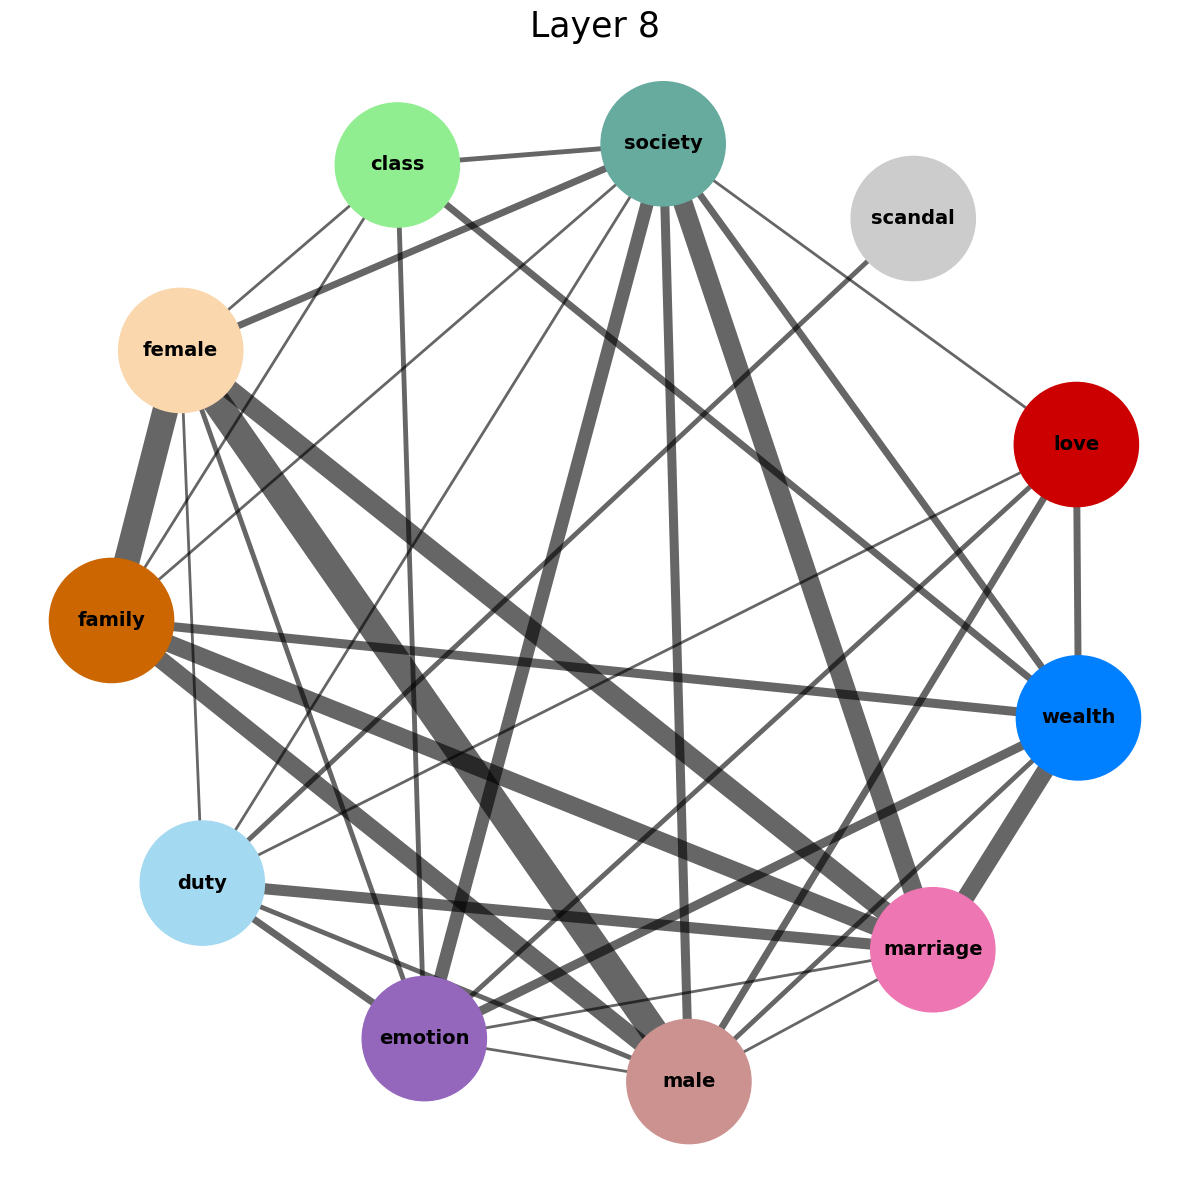

In [23]:
plot_dual_theme_graph_from_csv("sae_probing/neuron_concept_primary_secondary_l8.csv", spread=100, layer=8)

In [24]:
import glob, os
import pandas as pd

base_dir = "sae_probing"

In [25]:
pattern = os.path.join(base_dir, "neuron_label_assoc_l*.csv")
files = sorted(glob.glob(pattern))

dfs = []
for f in files:
    df = pd.read_csv(f)
    # make sure each file has a 'layer' column
    if "layer" not in df.columns:
        # try to parse layer number from filename
        layer_num = int(os.path.basename(f).split("_l")[-1].split(".")[0])
        df["layer"] = layer_num
    dfs.append(df)

merged = pd.concat(dfs, ignore_index=True)
out_path = os.path.join(base_dir, "neuron_label_assoc_all_layers.csv")
merged.to_csv(out_path, index=False)

print(f"✅ Merged {len(files)} files into {out_path}, total rows: {len(merged)}")

✅ Merged 8 files into sae_probing\neuron_label_assoc_all_layers.csv, total rows: 5731


In [26]:
pattern = os.path.join(base_dir, "neuron_concept_primary_secondary_l*.csv")
files = sorted(glob.glob(pattern))

dfs = []
for f in files:
    df = pd.read_csv(f)
    # make sure each file has a 'layer' column
    if "layer" not in df.columns:
        # try to parse layer number from filename
        layer_num = int(os.path.basename(f).split("_l")[-1].split(".")[0])
        df["layer"] = layer_num
    dfs.append(df)

merged = pd.concat(dfs, ignore_index=True)
out_path = os.path.join(base_dir, "neuron_concept_primary_secondary_all_layers.csv")
merged.to_csv(out_path, index=False)

print(f"✅ Merged {len(files)} files into {out_path}, total rows: {len(merged)}")

✅ Merged 8 files into sae_probing\neuron_concept_primary_secondary_all_layers.csv, total rows: 521


In [27]:
all_layers_assoc = pd.read_csv(os.path.join(base_dir, "neuron_label_assoc_all_layers.csv"))
all_layers_assoc = all_layers_assoc[all_layers_assoc["ΔP"] >= 0]
averages = (
    all_layers_assoc
    .drop(columns=["neuron", "concept"])
    .groupby("layer").mean(numeric_only=True)
)

out_path = os.path.join(base_dir, "analysis", "mean_assoc_metrics_all_layers.csv")
averages.to_csv(out_path)

averages.head()

,AP,AUROC,ΔP,P(fire|1),P(fire|0),lift,label_support,neuron_fires_total
layer,,,,,,,,
1,0.231657,0.516862,0.021795,0.027562,0.005767,3327.057672,133.083333,6.750000
2,0.264995,0.541116,0.055140,0.077015,0.021875,9540.632374,134.600000,21.800000
3,0.247244,0.544170,0.031589,0.046861,0.015272,5403.790876,129.614035,14.368421
4,0.249785,0.553747,0.037256,0.061155,0.023899,3249.655695,126.314286,20.790476
5,0.239123,0.548888,0.033633,0.053855,0.020222,2824.388411,124.385366,17.790244


In [28]:
top_neurons = all_layers_assoc[all_layers_assoc["AP"] >= 0.5].sort_values(by='AP', ascending=False)
top_neurons

,layer,neuron,concept,AP,AUROC,ΔP,P(fire|1),P(fire|0),lift,label_support,neuron_fires_total
2531,6,4328,male,0.737415,0.842854,0.076928,0.076930,0.000002,41157.460189,130,10
3158,7,1773,male,0.668455,0.796463,0.100004,0.100006,0.000002,53503.463645,130,13
1134,5,2246,male,0.638166,0.772602,0.176926,0.176928,0.000002,94656.808499,130,23
595,4,2130,male,0.612166,0.760920,0.176926,0.176928,0.000002,94656.808499,130,23
276,3,2130,male,0.593164,0.725392,0.046159,0.046161,0.000002,24696.122247,130,6
100,2,1466,male,0.564488,0.736988,0.038467,0.038469,0.000002,20580.787762,130,5
2609,7,121,family,0.561037,0.778646,0.368962,0.445313,0.076352,5.832398,128,98
1122,5,2093,female,0.534264,0.728040,0.102194,0.102196,0.000002,53959.446568,137,14
352,3,3419,female,0.521445,0.745936,0.087595,0.087597,0.000002,46251.504768,137,12


In [29]:
all_mappings = pd.read_csv(os.path.join(base_dir, "neuron_concept_primary_secondary_all_layers.csv"))
# target (layer, neuron) pairs
targets = list(zip(top_neurons["layer"], top_neurons["neuron"]))
keys = pd.DataFrame(targets, columns=["layer", "neuron"])

filtered = all_mappings.merge(keys, on=["layer", "neuron"], how="inner").sort_values(by='primary_AP', ascending=False)
# rows NOT in the targets:
# dropped = df.merge(keys, on=["layer","neuron"], how="left", indicator=True).query("_merge=='left_only'").drop(columns="_merge")
filtered

,layer,neuron,primary_concept,primary_AP,secondary_concept,secondary_AP,polarity_score,polarity_flag
6,6,4328,male,0.737415,NaN,NaN,1.000000,dominant
8,7,1773,male,0.668455,family,0.251272,0.624100,dominant
5,5,2246,male,0.638166,family,0.213621,0.665258,dominant
3,4,2130,male,0.612166,family,0.222453,0.636613,dominant
1,3,2130,male,0.593164,love,0.156679,0.735860,dominant
0,2,1466,male,0.564488,NaN,NaN,1.000000,dominant
7,7,121,family,0.561037,female,0.299657,0.465887,leaning
4,5,2093,female,0.534264,NaN,NaN,1.000000,dominant
2,3,3419,female,0.521445,family,0.324680,0.377346,leaning


In [30]:
2	1466	male	0.562376	0.739152	0.038467	0.038469	0.000002	20580.787762	130	5
3	2130	male	0.591759	0.724515	0.046159	0.046161	0.000002	24696.122247	130	6
3	3419	female	0.520192	0.745646	0.088893	0.088895	0.000002	47114.491866	135	12
4	2130	male	0.611021	0.761150	0.176926	0.176928	0.000002	94656.808499	130	23
5	2093	female	0.537879	0.730776	0.103708	0.103710	0.000002	54966.252864	135	14


SyntaxError: invalid syntax (3447113425.py, line 1)

In [ ]:
	layer	neuron	primary_concept	primary_AP	secondary_concept	secondary_AP	polarity_score	polarity_flag
6	6	4328	male	0.735733	NaN		NaN			1.000000	dominant
8	7	1773	male	0.673313	family	0.249948	0.628779	dominant
5	5	2246	male	0.635729	family	0.212634	0.665528	dominant
3	4	2130	male	0.611021	family	0.222909	0.635185	dominant
1	3	2130	male	0.591759	love	0.148209	0.749545	dominant
0	2	1466	male	0.562376	NaN		NaN			1.000000	dominant
7	7	121		family	0.561747	female	0.297654	0.470128	leaning